In [ ]:
pip install pandas matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**TEMPS DE CODIFICACIÓ**

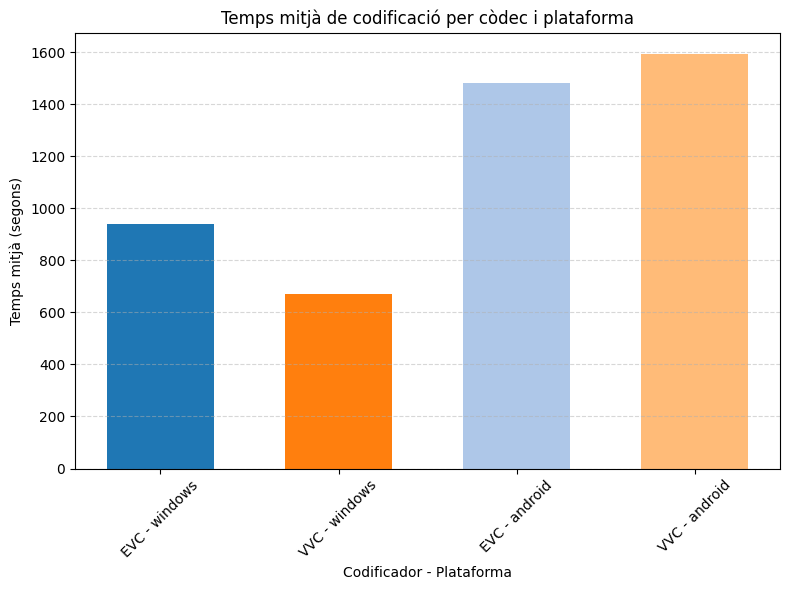

In [8]:
# Carregar les dades
df = pd.read_csv("temps_codificacio.csv")

# EIX X combinant codificador i plataforma
df['label'] = df['codificador'] + " - " + df['platform']

# Colors personalitzats
colors = {
    ('EVC', 'windows'): '#1f77b4',
    ('EVC', 'android'): '#aec7e8',
    ('VVC', 'windows'): '#ff7f0e',
    ('VVC', 'android'): '#ffbb78'
}

bar_colors = df.apply(lambda row: colors[(row['codificador'], row['platform'])], axis=1)


# Gràfic de barres
plt.figure(figsize=(8, 6))
plt.bar(df['label'], df['mitjana_temps'], color=bar_colors, width=0.6)

plt.title("Temps mitjà de codificació per còdec i plataforma")
plt.xlabel("Codificador - Plataforma")
plt.ylabel("Temps mitjà (segons)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

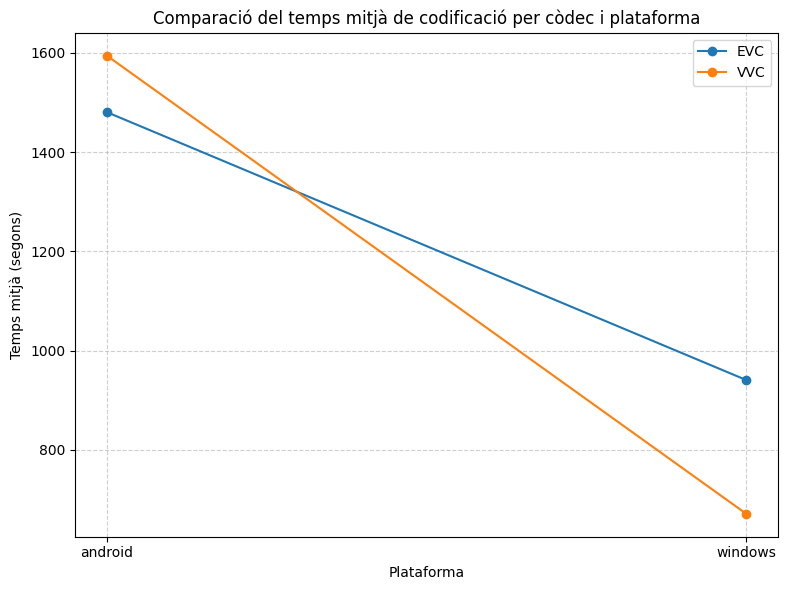

In [4]:
pivot_df = df.pivot(index='platform', columns='codificador', values='mitjana_temps')

# Gràfic de línies creuades
plt.figure(figsize=(8, 6))
plt.plot(pivot_df.index, pivot_df['EVC'], marker='o', label='EVC')
plt.plot(pivot_df.index, pivot_df['VVC'], marker='o', label='VVC')

plt.title("Comparació del temps mitjà de codificació per còdec i plataforma")
plt.ylabel("Temps mitjà (segons)")
plt.xlabel("Plataforma")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

Temps de Codificació per a cada categoria

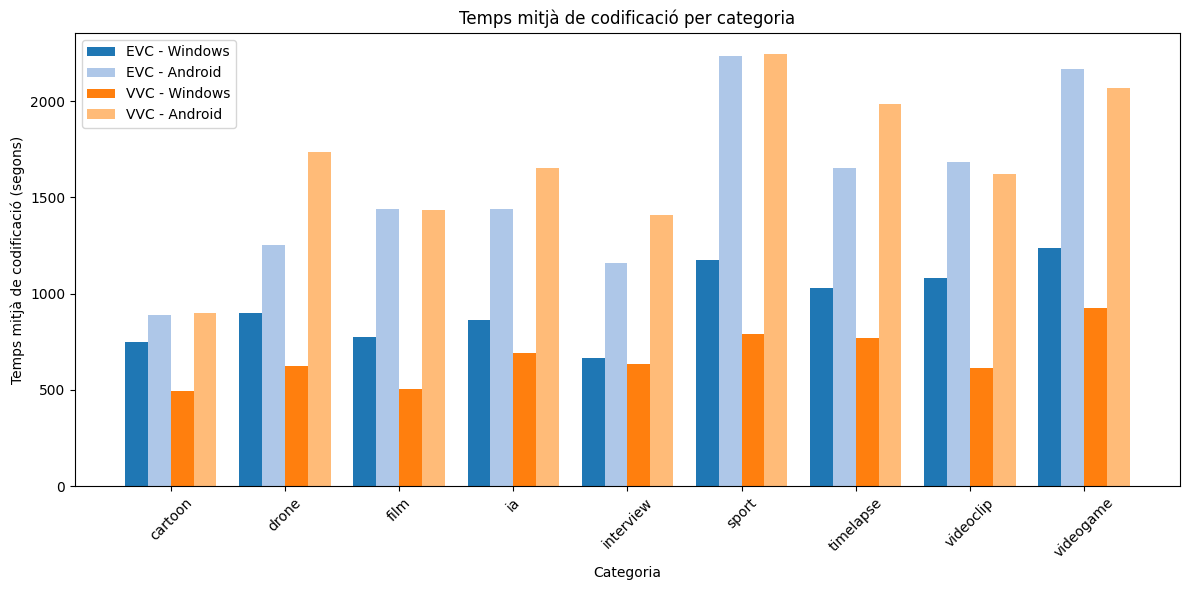

In [6]:
# Carregar el CSV
df = pd.read_csv("temps_codificacio_categories.csv")

# Neteja i normalització
df.columns = df.columns.str.strip()
df['platform'] = df['platform'].str.capitalize()  

# Obtenir categories úniques i ordenades
categories = sorted(df['categoria'].unique())

codecs = df['codificador'].unique()
platforms = df['platform'].unique()

x = np.arange(len(categories))
bar_width = 0.2

plt.figure(figsize=(12, 6))

# Colors personalitzats
colors = {
    ('EVC', 'Windows'): '#1f77b4',
    ('EVC', 'Android'): '#aec7e8',
    ('VVC', 'Windows'): '#ff7f0e',
    ('VVC', 'Android'): '#ffbb78'
}

# Barres per a cada combinació còdec i plataforma
for i, (codec, platform) in enumerate([(c, p) for c in codecs for p in platforms]):
    subset = df[(df['codificador'] == codec) & (df['platform'] == platform)]
    temps = [
        subset[subset['categoria'] == cat]['temps_mitja'].values[0]
        if not subset[subset['categoria'] == cat].empty else 0
        for cat in categories
    ]
    plt.bar(x + i * bar_width, temps, width=bar_width, label=f'{codec} - {platform}', color=colors[(codec, platform)])

plt.xlabel("Categoria")
plt.ylabel("Temps mitjà de codificació (segons)")
plt.title("Temps mitjà de codificació per categoria")
plt.xticks(x + bar_width * 1.5, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



**MIDA DE SORTIDA**

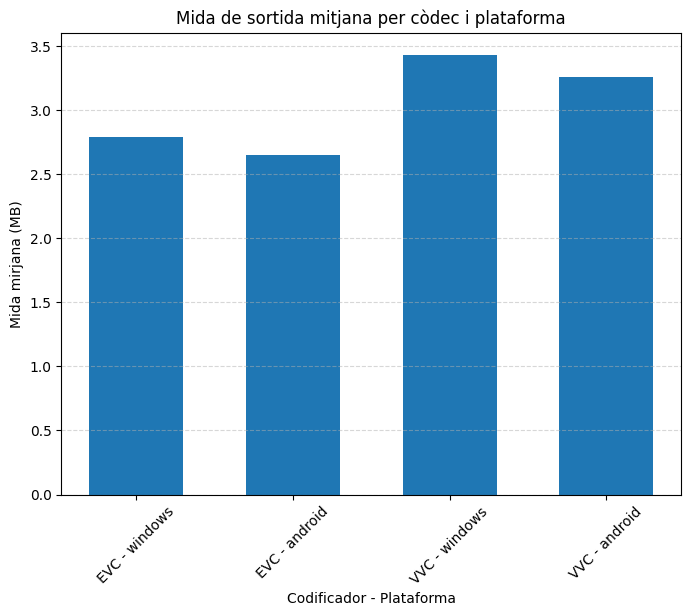

In [ ]:
# Carregar les dades
df = pd.read_csv("mida_sortida.csv")

# EIX X combinant codificador i plataforma
df['label'] = df['codificador'] + " - " + df['platform']


# Gràfic de barres
plt.figure(figsize=(8, 6))
plt.bar(df['label'], df['mida_mitjana'], width=0.6)

plt.title("Mida de sortida mitjana per còdec i plataforma")
plt.xlabel("Codificador - Plataforma")
plt.ylabel("Mida mirjana (MB)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Extrems de la mida de sortida

In [ ]:
# Carregar el CSV amb dades detallades per vídeo
df = pd.read_csv("resultats_codificacio.csv")

# Mida mínima absoluta
min_row = df.loc[df['mida_sortida_mb'].idxmin()]
print("Mida mínima:")
print(min_row[['nom_video', 'categoria', 'codificador', 'platform', 'mida_sortida_mb']])

# Mida màxima absoluta
max_row = df.loc[df['mida_sortida_mb'].idxmax()]
print("\nMida màxima:")
print(max_row[['nom_video', 'categoria', 'codificador', 'platform', 'mida_sortida_mb']])


Mida mínima:
nom_video          beautiful_sunrise.yuv
categoria                      timelapse
codificador                          EVC
platform                         android
mida_sortida_mb                     0.25
Name: 137, dtype: object

Mida màxima:
nom_video          red_bull_jackson_goldstone.yuv
categoria                                   sport
codificador                                   EVC
platform                                  windows
mida_sortida_mb                           12.9804
Name: 118, dtype: object


Mida de sortida per a cada categoria

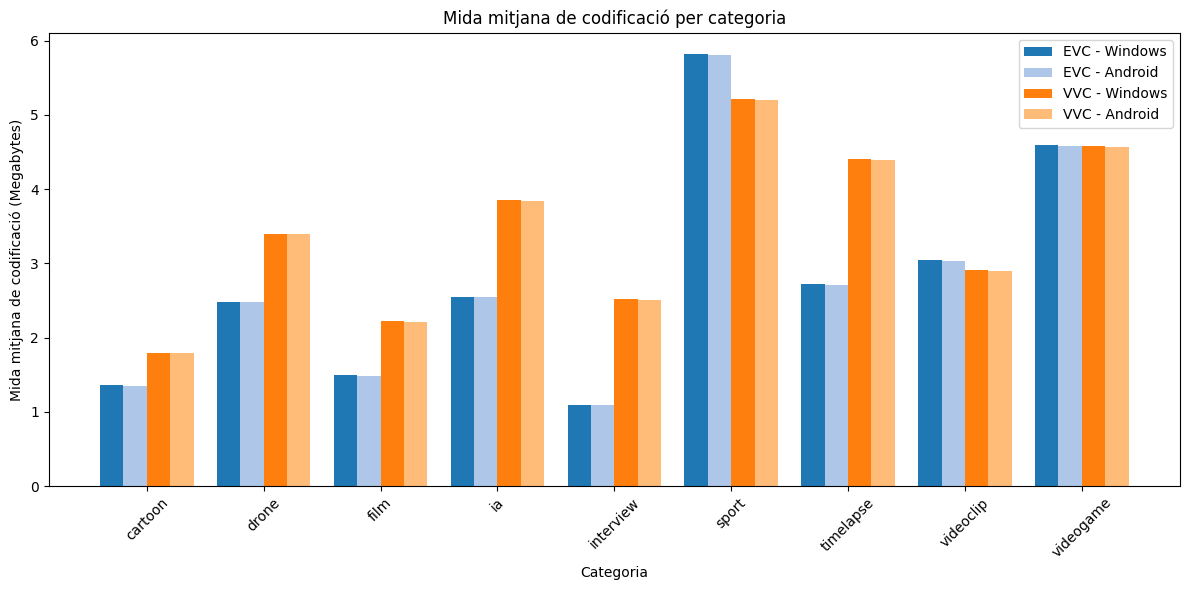

In [39]:
# Carregar el CSV
df = pd.read_csv("mida_sortida_categories.csv")

# Neteja i normalització
df.columns = df.columns.str.strip()
df['platform'] = df['platform'].str.capitalize()  

# Obtenir categories úniques i ordenades
categories = sorted(df['categoria'].unique())

codecs = df['codificador'].unique()
platforms = df['platform'].unique()

x = np.arange(len(categories))
bar_width = 0.2

plt.figure(figsize=(12, 6))

# Colors personalitzats
colors = {
    ('EVC', 'Windows'): '#1f77b4',
    ('EVC', 'Android'): '#aec7e8',
    ('VVC', 'Windows'): '#ff7f0e',
    ('VVC', 'Android'): '#ffbb78'
}

# Barres per a cada combinació còdec i plataforma
for i, (codec, platform) in enumerate([(c, p) for c in codecs for p in platforms]):
    subset = df[(df['codificador'] == codec) & (df['platform'] == platform)]
    temps = [
        subset[subset['categoria'] == cat]['mida_mitjana'].values[0]
        if not subset[subset['categoria'] == cat].empty else 0
        for cat in categories
    ]
    plt.bar(x + i * bar_width, temps, width=bar_width, label=f'{codec} - {platform}', color=colors[(codec, platform)])

plt.xlabel("Categoria")
plt.ylabel("Mida mitjana de codificació (Megabytes)")
plt.title("Mida mitjana de codificació per categoria")
plt.xticks(x + bar_width * 1.5, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**EFICIÈNCIA DE COMPRESSIÓ**

L'eficiència de compressió es pot calcular com *eficiencia_compressio = mida_mitjana / temps_mitja*

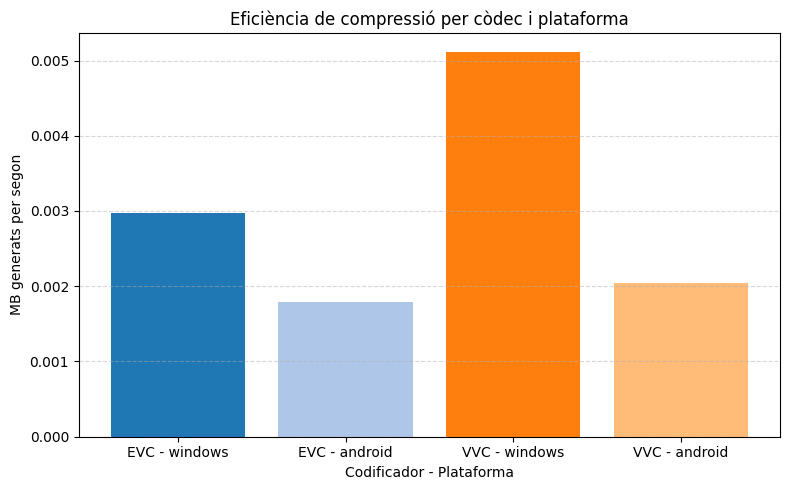

In [ ]:
# Carregar els datasets
df_mida = pd.read_csv("mida_sortida.csv")
df_temps = pd.read_csv("temps_codificacio.csv")

# Normalitzar columnes
df_mida.columns = df_mida.columns.str.strip()
df_temps.columns = df_temps.columns.str.strip()

# codificador + plataforma
df = pd.merge(df_mida, df_temps, on=['codificador', 'platform'])

# Calcular eficiència de compressió
df['eficiencia'] = df['mida_mitjana'] / df['mitjana_temps']

# Crear columna de label per a l’eix X
df['label'] = df['codificador'] + " - " + df['platform']

colors = {
    ('EVC', 'windows'): '#1f77b4',
    ('EVC', 'android'): '#aec7e8',
    ('VVC', 'windows'): '#ff7f0e',
    ('VVC', 'android'): '#ffbb78'
}

bar_colors = [colors[(row['codificador'], row['platform'])] for _, row in df.iterrows()]

# Gràfic de barres
plt.figure(figsize=(8, 5))
plt.bar(df['label'], df['eficiencia'], color=bar_colors)

plt.title("Eficiència de compressió per còdec i plataforma")
plt.xlabel("Codificador - Plataforma")
plt.ylabel("MB generats per segon")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**LECTURA I/O**

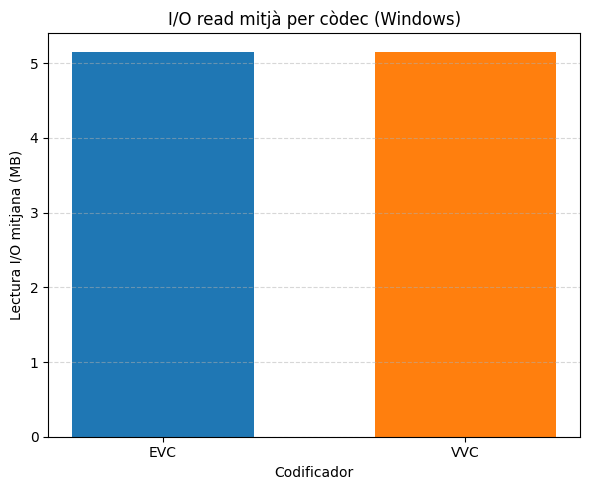

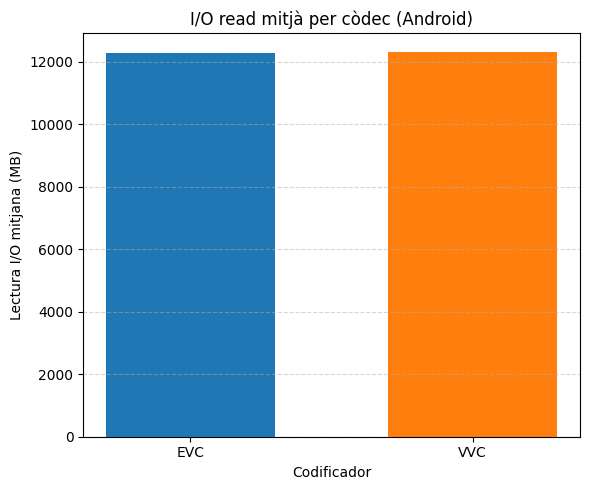

In [57]:
# Carregar les dades
df = pd.read_csv("lectura_io.csv")


df.columns = df.columns.str.strip()
df['platform'] = df['platform'].str.capitalize()

# Colors personalitzats
colors = {
    ('EVC', 'Windows'): '#1f77b4',
    ('VVC', 'Windows'): '#ff7f0e',
    ('EVC', 'Android'): '#1f77b4',
    ('VVC', 'Android'): '#ff7f0e'
}

# Funció del gràfic
def plot_io_read(df_platform, platform_name):
    plt.figure(figsize=(6, 5))
    subset = df_platform[df_platform['platform'] == platform_name]
    labels = subset['codificador']
    values = subset['io_read_mitjana']
    bar_colors = [colors[(row['codificador'], platform_name)] for _, row in subset.iterrows()]

    plt.bar(labels, values, color=bar_colors, width=0.6)
    plt.title(f"I/O read mitjà per còdec ({platform_name})")
    plt.xlabel("Codificador")
    plt.ylabel("Lectura I/O mitjana (MB)")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gràfic per Windows
plot_io_read(df, "Windows")

# Gràfic per Android
plot_io_read(df, "Android")


Lectura I/O per a cada categoria

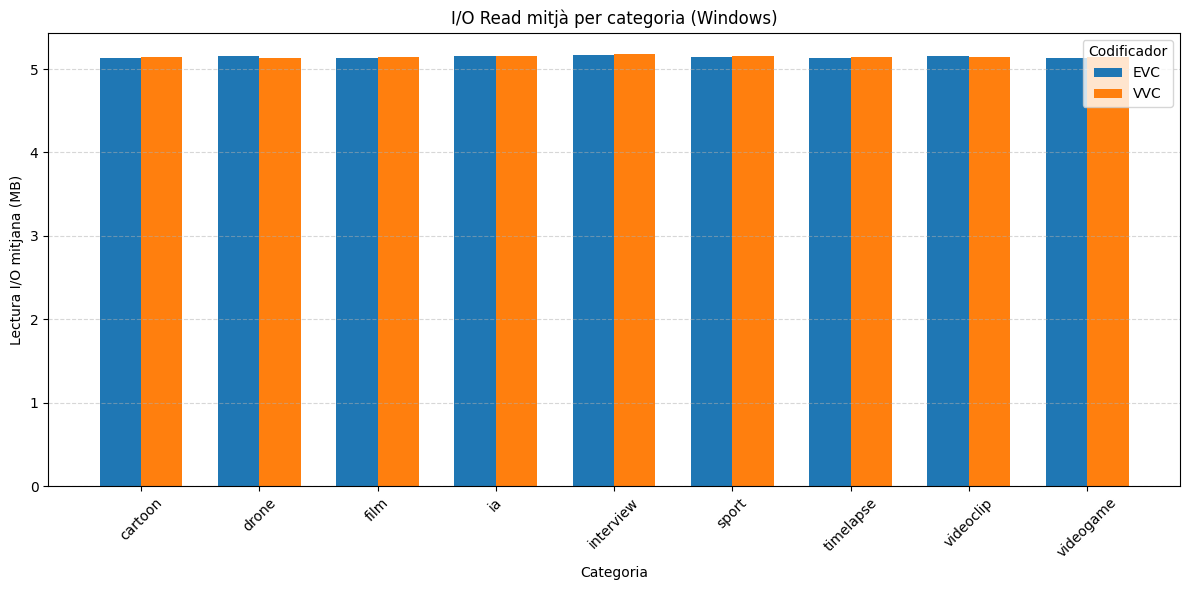

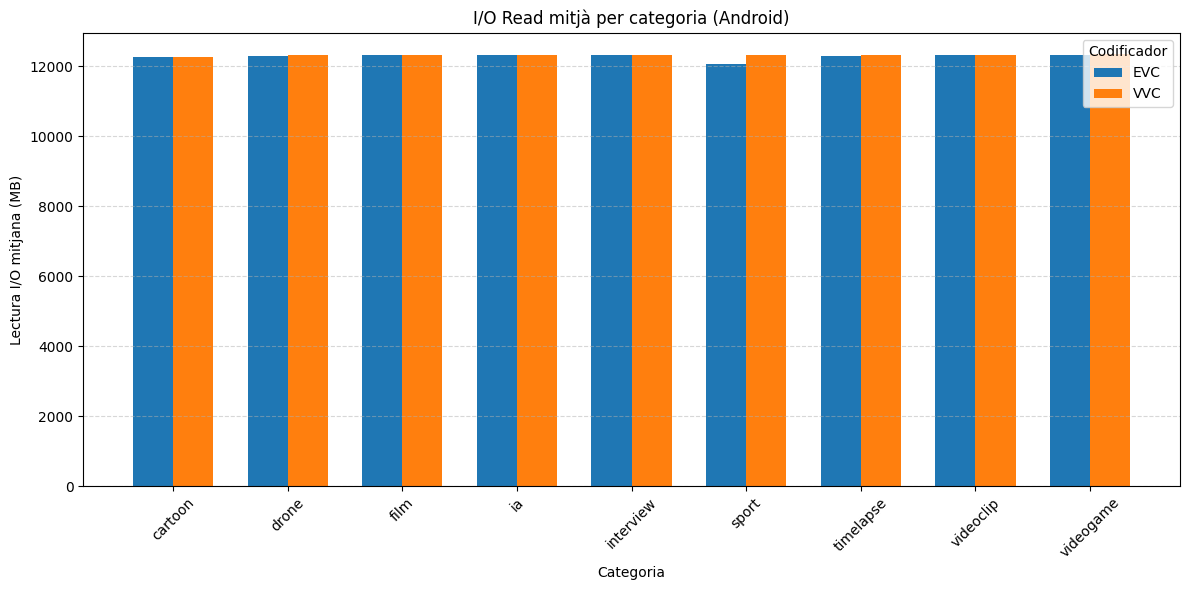

In [56]:

# Carregar dades
df = pd.read_csv("lectura_io_categories.csv")

# Neteja i normalització
df.columns = df.columns.str.strip()
df['platform'] = df['platform'].str.capitalize()

# Colors personalitzats
colors = {
    ('EVC', 'Windows'): '#1f77b4',
    ('VVC', 'Windows'): '#ff7f0e',
    ('EVC', 'Android'): '#1f77b4',
    ('VVC', 'Android'): '#ff7f0e'
}

def plot_io_read(df_platform, platform_name):
    categories = sorted(df_platform['categoria'].unique())
    codecs = ['EVC', 'VVC']
    x = np.arange(len(categories))
    bar_width = 0.35

    plt.figure(figsize=(12, 6))
    for i, codec in enumerate(codecs):
        subset = df_platform[df_platform['codificador'] == codec]
        values = [subset[subset['categoria'] == cat]['io_read_mitjana'].values[0]
                  if not subset[subset['categoria'] == cat].empty else 0
                  for cat in categories]
        plt.bar(x + i * bar_width, values,
                width=bar_width,
                label=codec,
                color=colors[(codec, platform_name)])

    # Format del gràfic
    plt.title(f"I/O Read mitjà per categoria ({platform_name})")
    plt.xlabel("Categoria")
    plt.ylabel("Lectura I/O mitjana (MB)")
    plt.xticks(x + bar_width / 2, categories, rotation=45)
    plt.legend(title="Codificador")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gràfic per Windows
plot_io_read(df[df['platform'] == 'Windows'], 'Windows')

# Gràfic per Android
plot_io_read(df[df['platform'] == 'Android'], 'Android')